In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [165]:
df=pd.read_csv(r"train.csv")

In [166]:
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [167]:
df

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787              36.396602             1.449309   
2              66.361592              36.122509             1.181795   
3              66.361592              36.119560             1.181795   
4              66.361592              36.110716             1.181795   
...                  ...                    ...                  ...   
21258          82.515384              43.135565             1.177145   
21259          64.812662              32.867748             1.323287   
21260          99.433882              95.464320             0.690847   
21261          99.433882              96.901083             0.690847   
21262          82.555758              80.458722             1.041270   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                     1.062396          122.90607              31.794921   
1                     1.057755          122.90607              36.161939   
2                     0.975980          122.90607              35.741099   
3                     1.022291          122.90607              33.768010   
4                     1.129224          122.90607              27.848743   
...                        ...                ...                    ...   
21258                 1.254119          146.88130              15.504479   
21259                 1.571630          188.38390               7.353333   
21260                 0.530198           13.51362              53.041104   
21261                 0.640883           13.51362              31.115202   
21262                 0.895229           71.75500              43.144000   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
0            51.968828  ...          2.257143       2.213364   
1            47.094633  ...          2.257143       1.888175   
2            51.968828  ...          2.271429       2.213364   
3            51.968828  ...          2.264286       2.213364   
4            51.968828  ...          2.242857       2.213364   
...                ...  ...               ...            ...   
21258        65.764081  ...          3.555556       3.223710   
21259        69.232655  ...          2.047619       2.168944   
21260         6.756810  ...          4.800000       4.472136   
21261         6.756810  ...          4.690000       4.472136   
21262        29.905282  ...          4.500000       4.762203   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
0               2.219783         1.368922             1.066221              1   
1               2.210679         1.557113             1.047221              2   
2               2.232679         1.368922             1.029175              1   
3               2.226222         1.368922             1.048834              1   
4               2.206963         1.368922             1.096052              1   
...                  ...              ...                  ...            ...   
21258           3.519911         1.377820             0.913658  

In [168]:
x_vals=df.copy()

x_vals.drop('critical_temp',1,inplace=True)

y_vals=df['critical_temp']

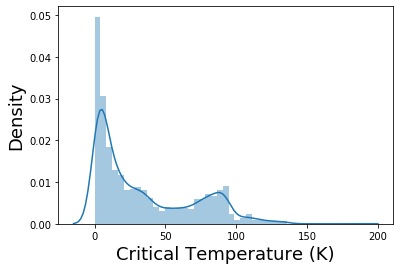

In [169]:
sns.distplot(df['critical_temp'])
plt.xlabel('Critical Temperature (K)',size=18)
plt.ylabel('Density',size=18)
plt.axis("tight")
plt.savefig('density.png')

In [170]:
df.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21263.000000       21263.000000           21263.000000   
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
count     21263.000000  ...      21263.000000   21263.000000   
mean         44.391893  ...          3.153127       3.056536   
std          20.035430  ...          1.191249       1.046257   
min           0.000000  ...          1.000000       1.000000   
25%          32.890369  ...          2.116732       2.279705   
50%          45.123500  ...          2.618182       2.615321   
75%          59.322812  ...          4.026201       3.727919   
max         101.019700  ...          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count       21263.000000     21263.000000         21263.000000   21263.000000   
mean            3.055885         1.295682             1.052841       2.041010   
std             1.174815         0.393155             0.380291       1.242345   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.091251         1.060857             0.775678       1.000000   
50%             2.434057         1.368922             1.166532       2.000000   
75%             3.914868         1.589027             1.330801       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  critical_temp  
count       21263.000000  21263.000000     21263.000000   21263.000000  
mean            1.483007      0.839342         0.673987      34.421219  
std             0.978176      0.484676         0.455580      34.254362  
min             0.000000      0.000000         0.000000       0.000210  
25%             0.921454      0.451754         0.306892       5.365000  
50%             1.063077      0.800000         0.500000      20.000000  
75%             1.918400      1.200000         1.020436      63.000000  
max             6.992200      3.000000         3.000000     185.000000  

[8 rows x 82 columns]

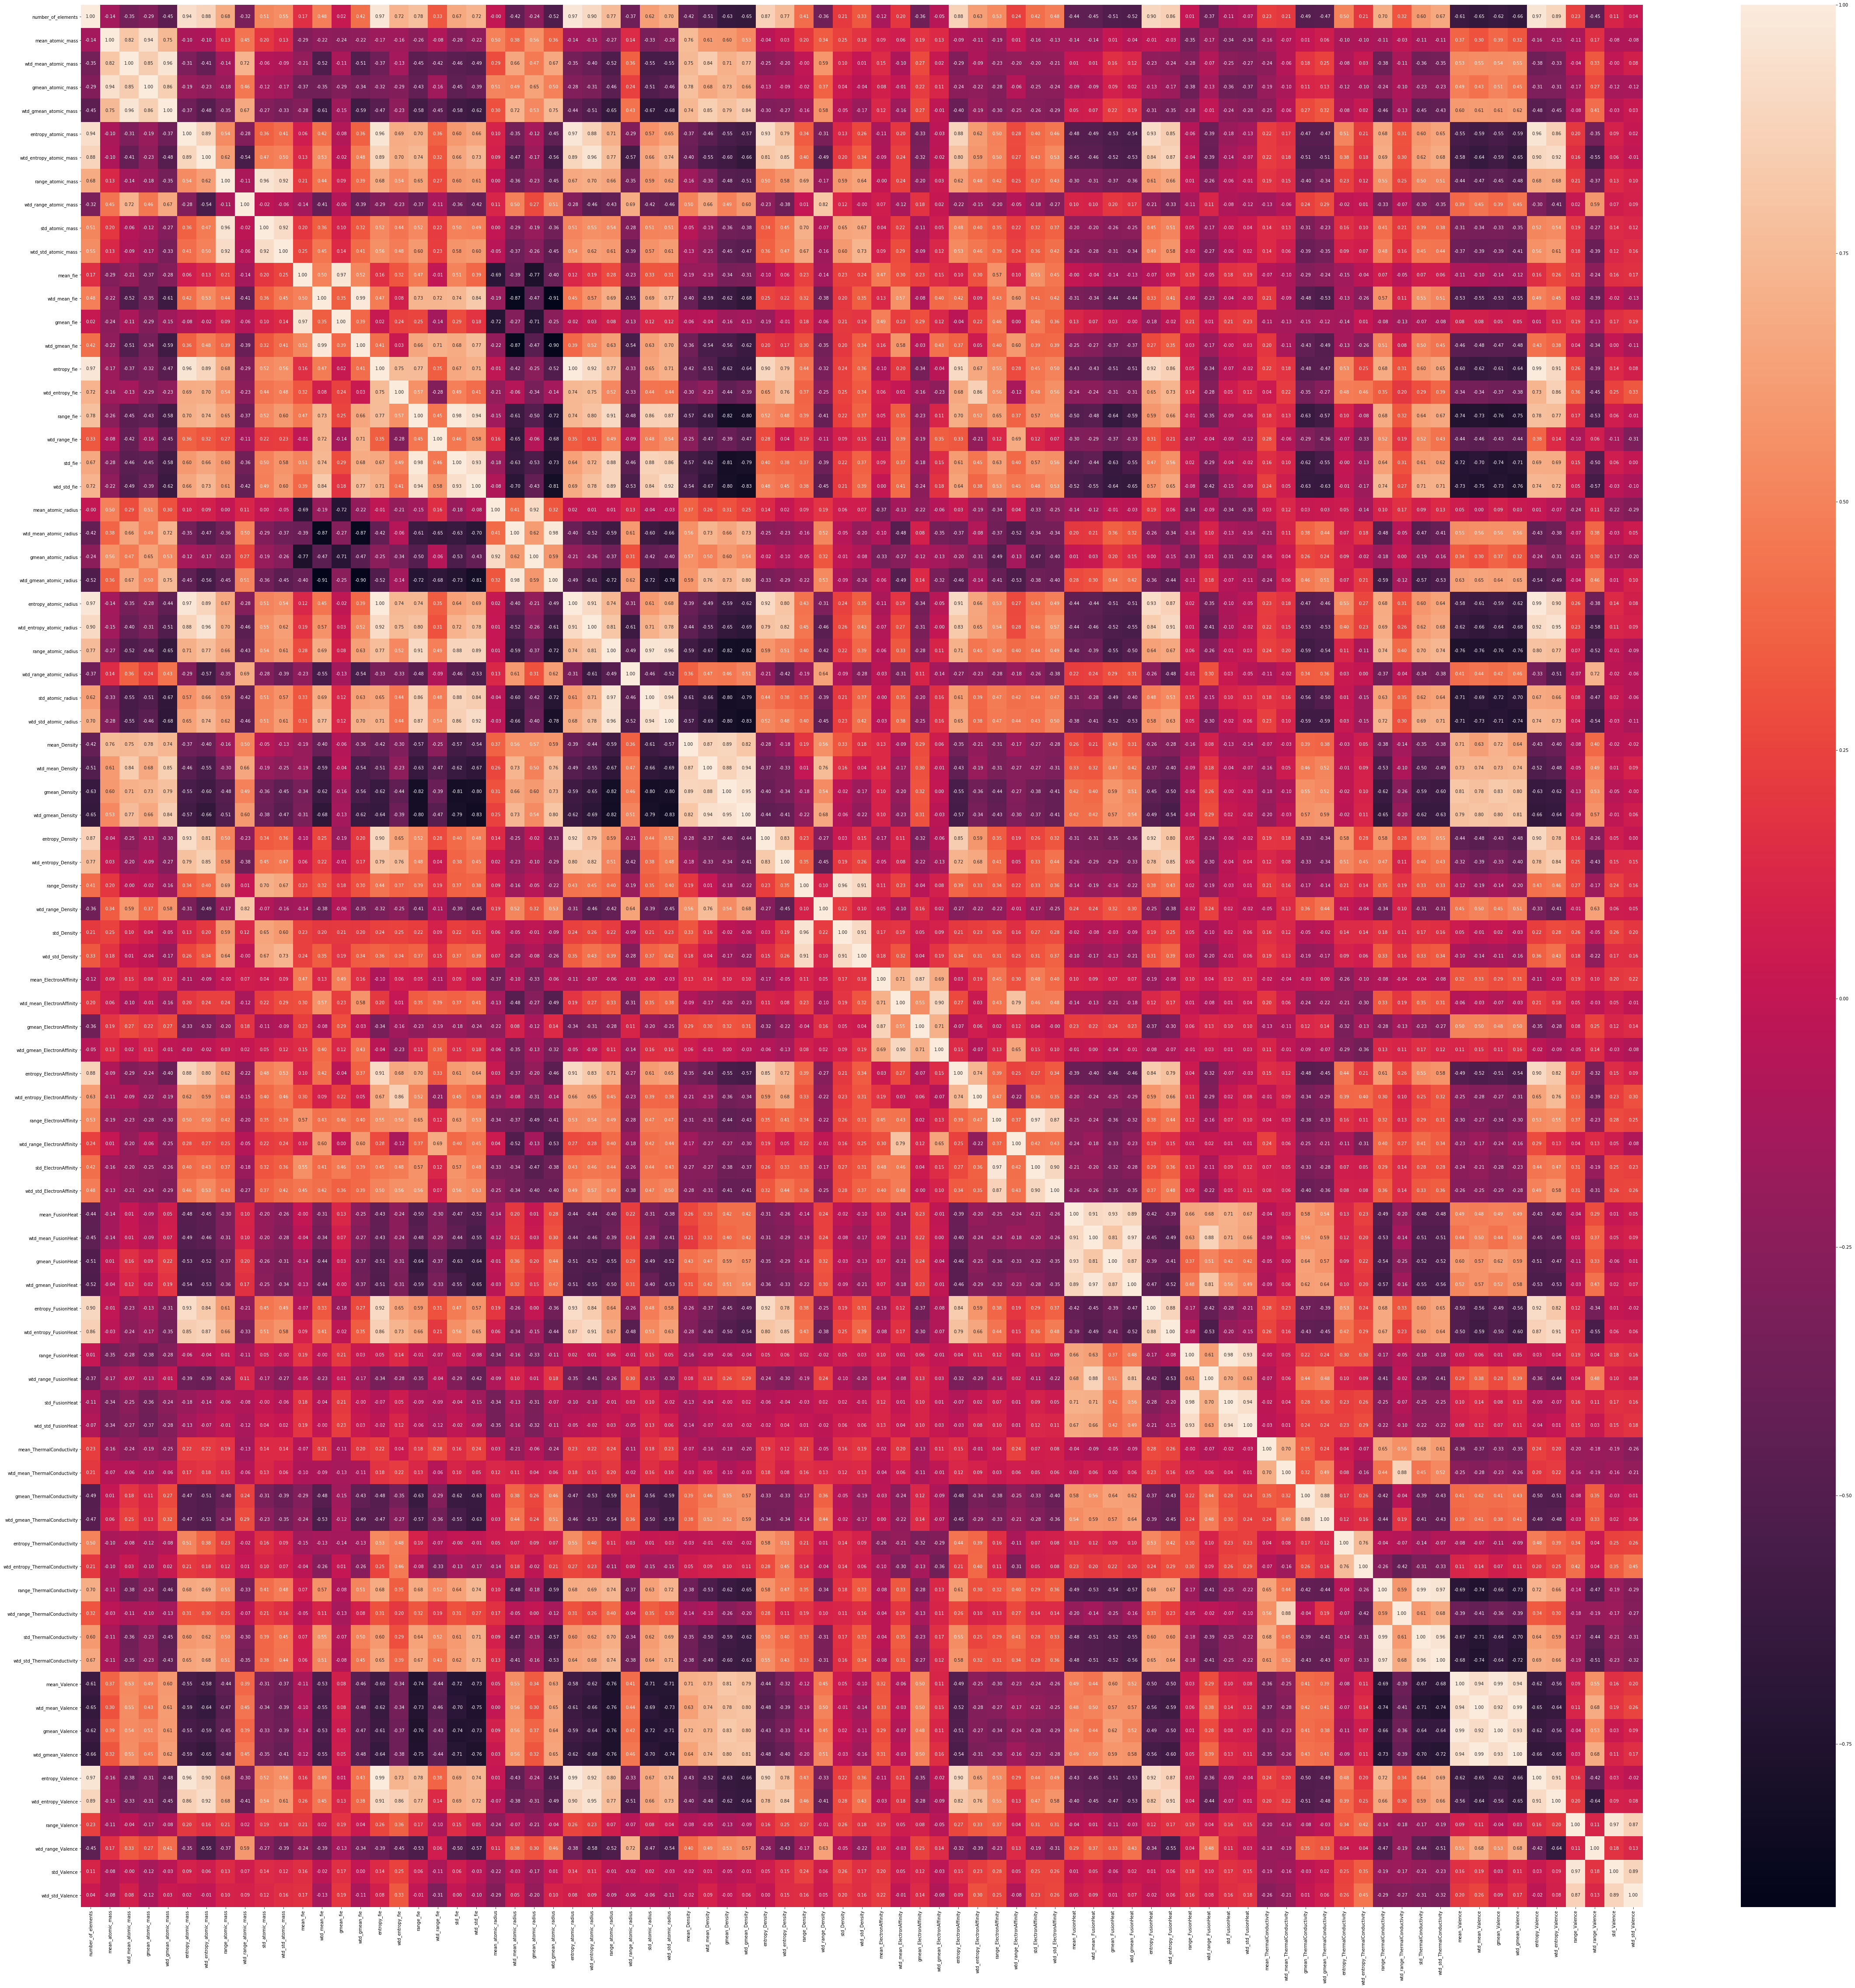

In [171]:
fig, ax = plt.subplots(figsize=(80, 80))
sns.heatmap(x_vals.corr(),annot=True, fmt=".2f")
plt.axis('tight')
plt.show()

Feature: 0, Score: -3.37094
Feature: 1, Score: 0.85109
Feature: 2, Score: -0.92761
Feature: 3, Score: -0.52213
Feature: 4, Score: 0.67845
Feature: 5, Score: -36.54147
Feature: 6, Score: 2.74817
Feature: 7, Score: 0.20205
Feature: 8, Score: 0.02179
Feature: 9, Score: -0.54206
Feature: 10, Score: 0.10117
Feature: 11, Score: 0.13414
Feature: 12, Score: -0.17891
Feature: 13, Score: -0.12524
Feature: 14, Score: 0.19690
Feature: 15, Score: -119.61465
Feature: 16, Score: 41.98288
Feature: 17, Score: 0.06898
Feature: 18, Score: 0.02197
Feature: 19, Score: -0.20423
Feature: 20, Score: -0.02090
Feature: 21, Score: -0.50512
Feature: 22, Score: 3.24721
Feature: 23, Score: 0.17225
Feature: 24, Score: -2.86595
Feature: 25, Score: 79.33894
Feature: 26, Score: 45.08177
Feature: 27, Score: 0.18166
Feature: 28, Score: -0.09181
Feature: 29, Score: -0.31178
Feature: 30, Score: -0.33553
Feature: 31, Score: -0.00466
Feature: 32, Score: -0.00007
Feature: 33, Score: 0.00128
Feature: 34, Score: 0.00203
Feature

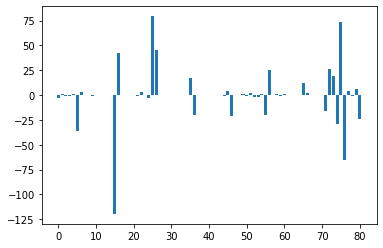

In [172]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
X_train, X_test, Y_train, Y_test = train_test_split(x_vals, y_vals, random_state=0)
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
lr=model.fit(X_train, Y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [173]:
def plot_feature_importances_demand(model):
    n_features = int(x_vals.shape[1])
    fig, ax = plt.subplots(figsize=(15, 30))
    plt.barh(range(n_features), importance, align='center',color='c')
    plt.yticks(np.arange(n_features),data_features_name,size=12 )
    plt.xlabel("Feature importance",size=12)
    plt.ylabel("Feature",size=12)
    plt.ylim(-1, n_features)

In [174]:
data_features_name=list(x_vals.columns)

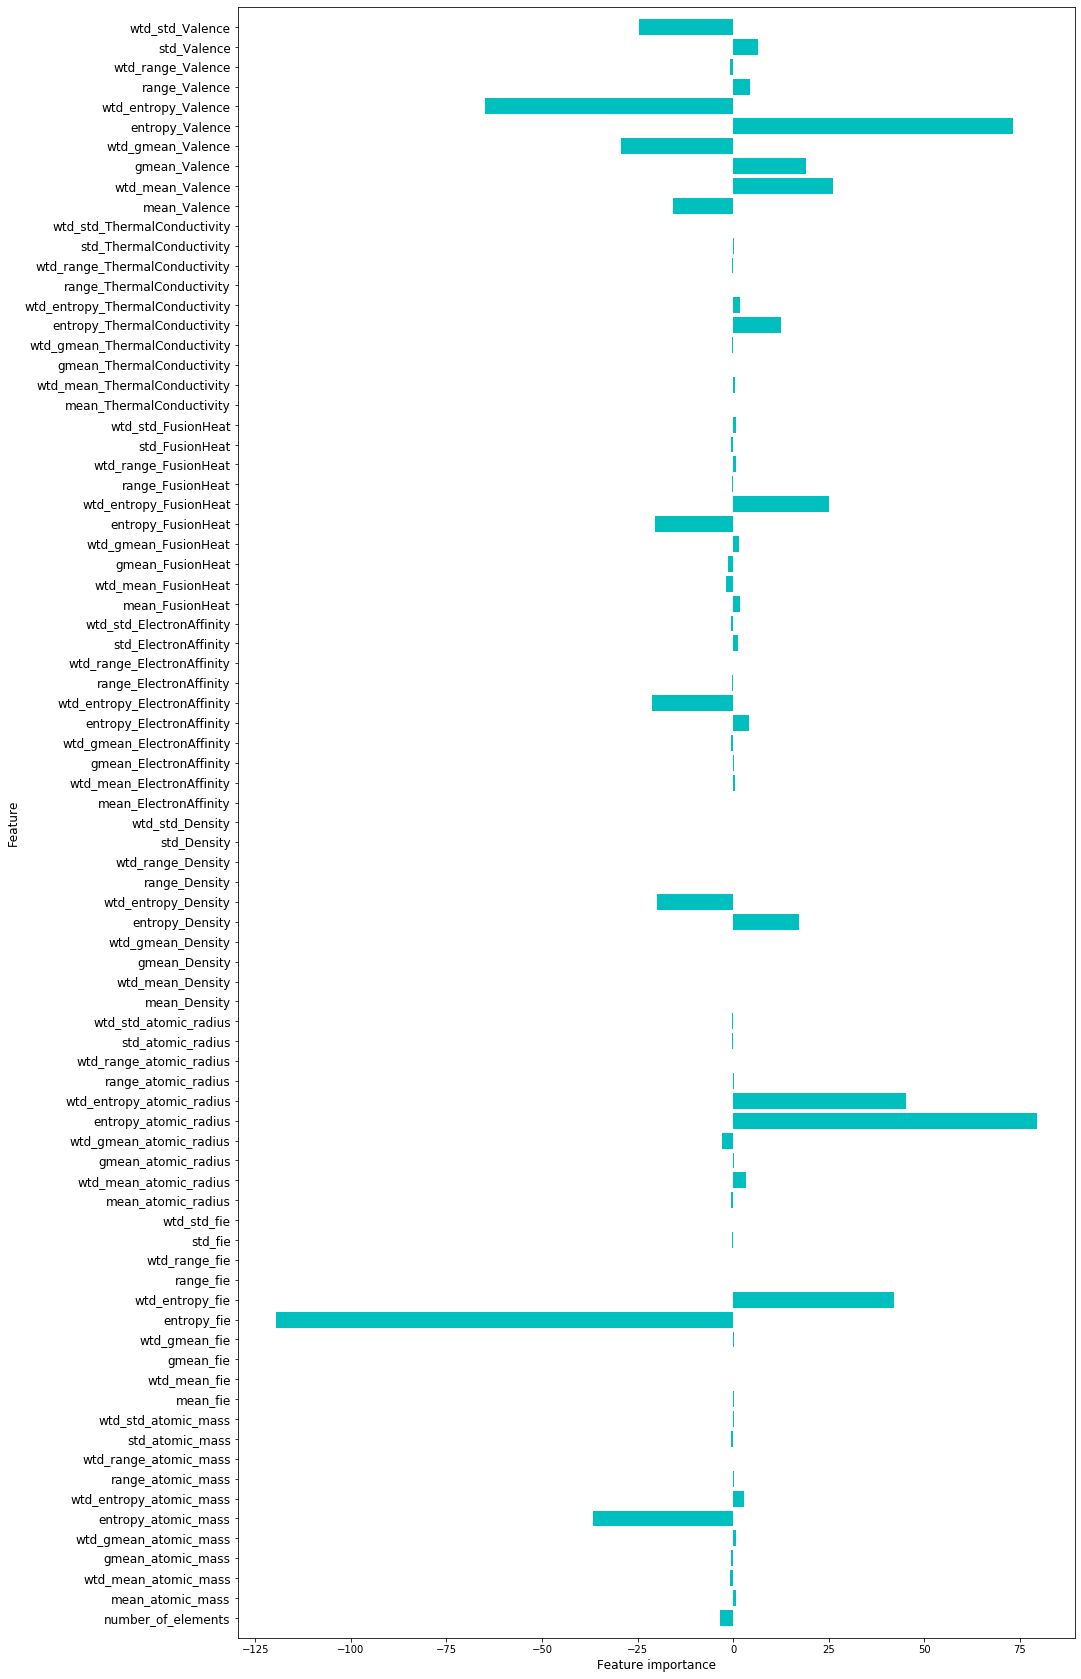

In [175]:
plot_feature_importances_demand(lr)

(0.0, 83.30589178933809, -1.3900000000000001, 20.39)

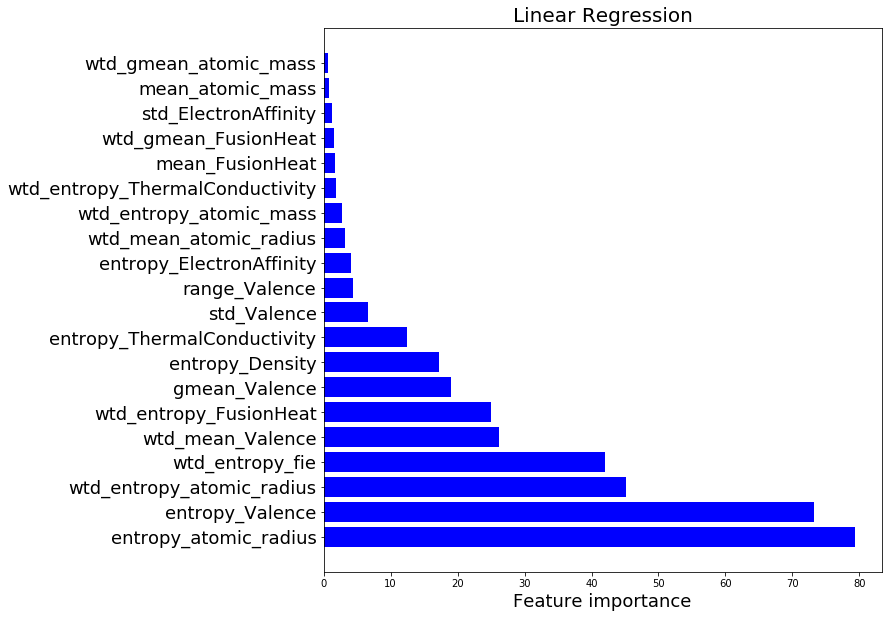

In [176]:
lr_imp=importance
df_lrimp=pd.DataFrame(lr_imp,columns=['importance'])
df_lrimp['features']=data_features_name
df_lrimp=df_lrimp.sort_values('importance',ascending=False)
df_lr_20=df_lrimp.head(20)
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(range(20), df_lr_20['importance'], align='center',color='b')
plt.yticks(np.arange(20),list(df_lr_20['features']),size=18 )
plt.xlabel("Feature importance",size=18)
#plt.ylabel("Feature",size=12)
plt.ylim(-1, 20)
plt.title("Linear Regression",size=20)
plt.axis('tight')


Feature: 0, Score: 0.00005
Feature: 1, Score: 0.00122
Feature: 2, Score: 0.00694
Feature: 3, Score: 0.00141
Feature: 4, Score: 0.00420
Feature: 5, Score: 0.00163
Feature: 6, Score: 0.00412
Feature: 7, Score: 0.00095
Feature: 8, Score: 0.00958
Feature: 9, Score: 0.02168
Feature: 10, Score: 0.00658
Feature: 11, Score: 0.00137
Feature: 12, Score: 0.00297
Feature: 13, Score: 0.00123
Feature: 14, Score: 0.00226
Feature: 15, Score: 0.00136
Feature: 16, Score: 0.00334
Feature: 17, Score: 0.00191
Feature: 18, Score: 0.00728
Feature: 19, Score: 0.00132
Feature: 20, Score: 0.00397
Feature: 21, Score: 0.00134
Feature: 22, Score: 0.00291
Feature: 23, Score: 0.00102
Feature: 24, Score: 0.00215
Feature: 25, Score: 0.00163
Feature: 26, Score: 0.00288
Feature: 27, Score: 0.00819
Feature: 28, Score: 0.00319
Feature: 29, Score: 0.00642
Feature: 30, Score: 0.00495
Feature: 31, Score: 0.01102
Feature: 32, Score: 0.00341
Feature: 33, Score: 0.00573
Feature: 34, Score: 0.00275
Feature: 35, Score: 0.00729
Fe

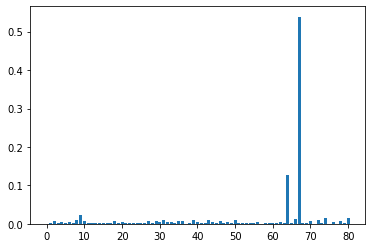

In [177]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
rfr=model.fit(X_train, Y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

(0.0, 0.5657809295326706, -1.3900000000000001, 20.39)

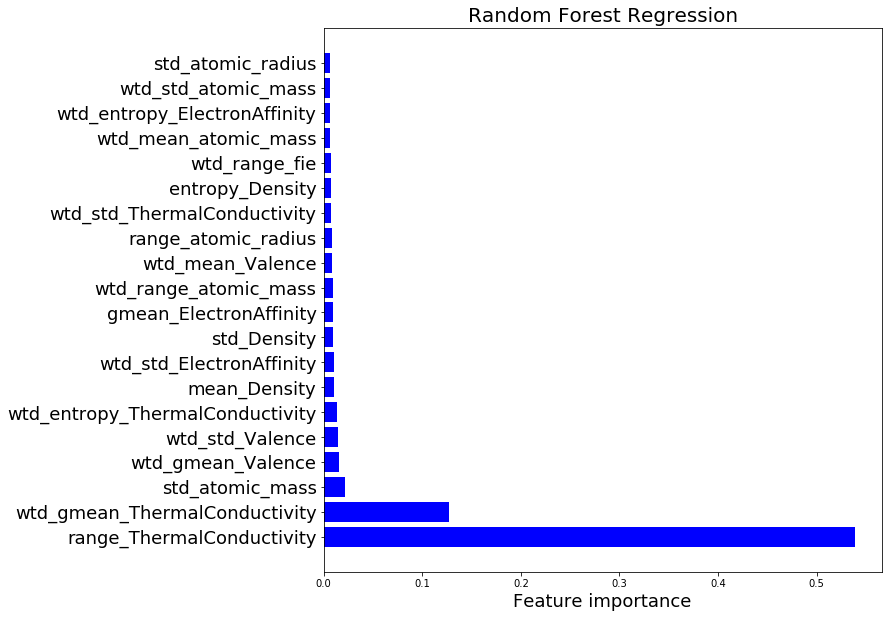

In [178]:
rfr_imp=importance
df_rfrimp=pd.DataFrame(rfr_imp,columns=['importance'])
df_rfrimp['features']=data_features_name
df_rfrimp=df_rfrimp.sort_values('importance',ascending=False)
df_rfr_20=df_rfrimp.head(20)
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(range(20), df_rfr_20['importance'], align='center',color='b')
plt.yticks(np.arange(20),list(df_rfr_20['features']),size=18 )
plt.xlabel("Feature importance",size=18)
#plt.ylabel("Feature",size=12)
plt.ylim(-1, 20)
plt.title("Random Forest Regression",size=20)
plt.axis('tight')

[21:51:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00071
Feature: 1, Score: 0.00131
Feature: 2, Score: 0.00435
Feature: 3, Score: 0.00135
Feature: 4, Score: 0.00048
Feature: 5, Score: 0.00145
Feature: 6, Score: 0.00925
Feature: 7, Score: 0.00950
Feature: 8, Score: 0.00249
Feature: 9, Score: 0.02002
Feature: 10, Score: 0.00260
Feature: 11, Score: 0.00167
Feature: 12, Score: 0.00105
Feature: 13, Score: 0.00355
Feature: 14, Score: 0.00217
Feature: 15, Score: 0.00161
Feature: 16, Score: 0.00471
Feature: 17, Score: 0.00437
Feature: 18, Score: 0.00514
Feature: 19, Score: 0.00279
Feature: 20, Score: 0.00164
Feature: 21, Score: 0.00189
Feature: 22, Score: 0.00167
Feature: 23, Score: 0.00118
Feature: 24, Score: 0.00031
Feature: 25, Score: 0.00229
Feature: 26, Score: 0.00340
Feature: 27, Score: 0.10337
Feature: 28, Score: 0.00315
Feature: 29, Score: 0.00149
Feature: 30, Score: 0.00260
Feature: 31, Score: 0.0059

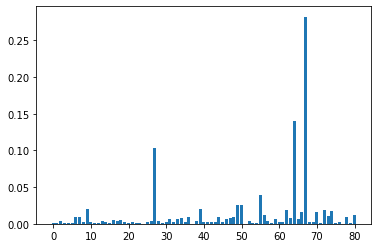

In [179]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = XGBRegressor()
# fit the model
xg=model.fit(x_vals, y_vals)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

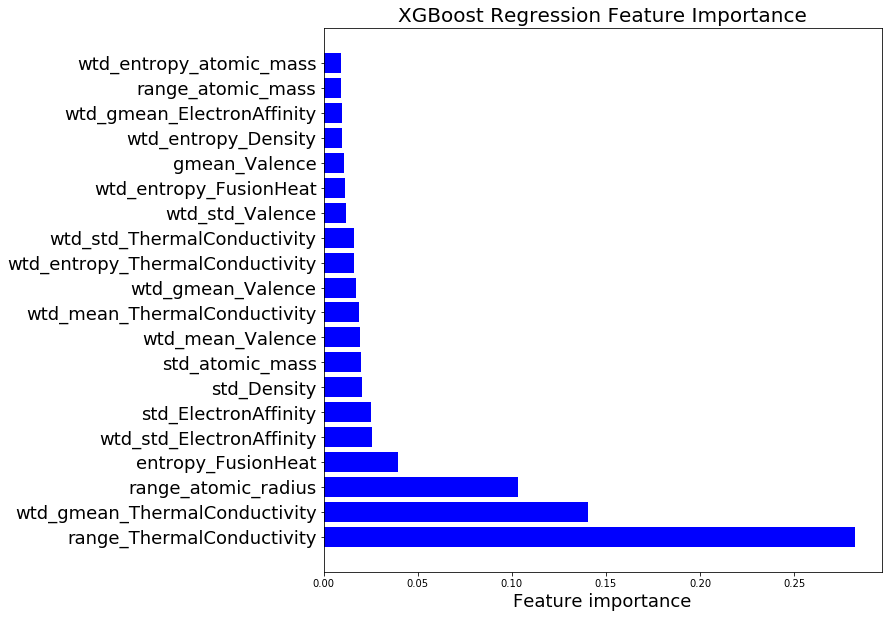

In [180]:
xg_imp=importance
df_xgimp=pd.DataFrame(xg_imp,columns=['importance'])
df_xgimp['features']=data_features_name
df_xgimp=df_xgimp.sort_values('importance',ascending=False)
df_xg_20=df_xgimp.head(20)
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(range(20), df_xg_20['importance'], align='center',color='b')
plt.yticks(np.arange(20),list(df_xg_20['features']),size=18 )
plt.xlabel("Feature importance",size=18)
#plt.ylabel("Feature",size=12)
plt.ylim(-1, 20)
plt.title("XGBoost Regression Feature Importance",size=20)
plt.axis('tight')
plt.savefig('xgboost.png')

In [181]:
pair_plot=df_xgimp.head(5)
pair_list=list(pair_plot['features'])
df_pplot=df.filter(pair_list)

In [182]:
pair_list

['range_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'range_atomic_radius',
 'entropy_FusionHeat',
 'wtd_std_ElectronAffinity']

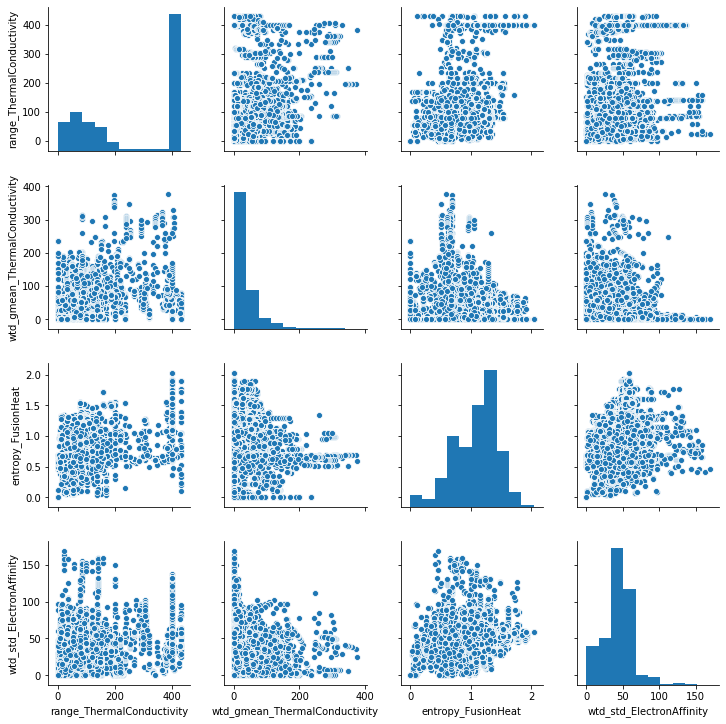

<Figure size 432x288 with 0 Axes>

In [183]:
sns.pairplot(df_pplot.loc[:,df_pplot.dtypes == 'float64'])
plt.show()
plt.savefig('pairplot.png')

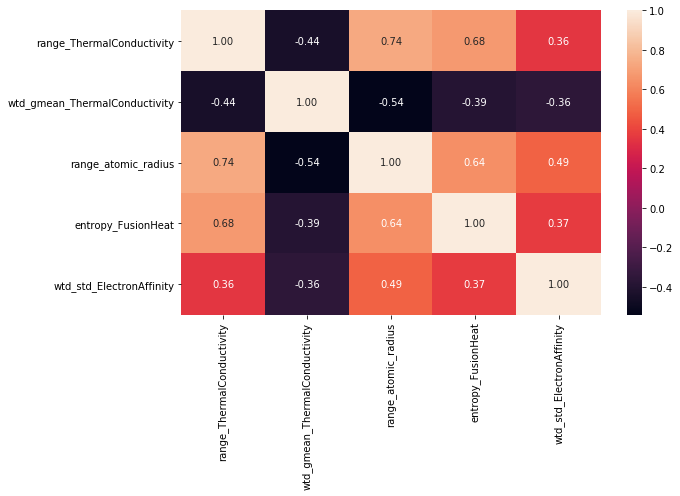

In [221]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_pplot.corr(),annot=True, fmt=".2f")
plt.axis('tight')
fig.tight_layout()
plt.savefig('corelation_5.png', dpi=300)

In [185]:
df_xgimpnew=df_xgimp[df_xgimp['importance']>0.0025]
len(df_xgimpnew)
to_filter=list(df_xgimpnew['features'])
x_vals_new=x_vals.filter(to_filter)

In [186]:
x_vals_new

range_ThermalConductivity  wtd_gmean_ThermalConductivity  \
0                      399.97342                       0.621979   
1                      429.97342                       0.619735   
2                      399.97342                       0.619095   
3                      399.97342                       0.620535   
4                      399.97342                       0.624878   
...                          ...                            ...   
21258                  134.00000                      95.001493   
21259                  399.97342                       1.577047   
21260                   17.00000                      57.038314   
21261                   17.00000                      58.781651   
21262                   78.48000                      12.919996   

       range_atomic_radius  entropy_FusionHeat  wtd_std_ElectronAffinity  \
0                      205            1.088575                 42.558396   
1                      205            1.374977                 41.667621   
2                      205            1.088575                 41.639878   
3                      205            1.088575                 42.102344   
4                      205            1.088575                 43.452059   
...                    ...                 ...                       ...   
21258                  111            1.245563                 55.219027   
21259                  205            1.345508                 57.634544   
21260                   29            0.665945                 12.960000   
21261                   29            0.665945                 14.984781   
21262                   53            1.002899                 87.740504   

       std_ElectronAffinity  std_Density  std_atomic_mass  wtd_mean_Valence  \
0                 51.433712  3306.162897        51.968828          2.257143   
1                 49.438167  3767.403176        47.094633          2.257143   
2                 51.433712  3306.162897        51.968828          2.271429   
3                 51.433712  3306.162897        51.968828          2.264286   
4                 51.433712  3306.162897        51.968828          2.242857   
...                     ...          ...              ...               ...   
21258             43.467883  2981.637585        65.764081          3.555556   
21259             58.434336  4506.895480        69.232655          2.047619   
21260             16.200000  1726.500000         6.756810          4.800000   
21261             16.200000  1726.500000         6.756810          4.690000   
21262             83.414480  1248.208583        29.905282          4.500000   

       wtd_mean_ThermalConductivity  ...  wtd_range_atomic_radius  \
0                         61.015189  ...                42.914286   
1                         61.372331  ...                50.571429   
2                         60.943760  ...                49.314286   
3                         60.979474  ...                46.114286   
4                         61.086617  ...                36.514286   
...                             ...  ...                      ...   
21258                    111.537778  ...                57.808889   
21259                    108.680590  ...                20.285714   
21260                     57.400000  ...               124.600000   
21261                     59.270000  ...                84.230000   
21262                     40.752000  ...                67.700000   

       wtd_mean_ElectronAffinity  entropy_Density  wtd_std_FusionHeat  \
0                     111.727143         1.033129            4.666920   
1                     112.316429         1.314442            4.603000   
2                     112.213571         1.033129            4.649635   
3                     111.970357         1.033129            4.658301   
4                     111.240714         1.033129            4.684014   
...                          ...              ...                 ...   


In [187]:
# Create correlation matrix
corr_matrix_new = x_vals_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_new.where(np.triu(np.ones(corr_matrix_new.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]

In [188]:
x_vals_new['Intercept']=1

In [189]:
to_drop

['wtd_gmean_Valence',
 'wtd_std_ThermalConductivity',
 'range_atomic_mass',
 'range_ElectronAffinity',
 'gmean_Density',
 'range_FusionHeat',
 'wtd_entropy_atomic_radius',
 'std_fie',
 'std_ThermalConductivity',
 'wtd_std_atomic_radius']

In [190]:
x_vals_new1=x_vals_new.drop(['wtd_gmean_Valence',
 'wtd_std_ThermalConductivity',
 'range_atomic_mass',
 'range_ElectronAffinity',
 'gmean_Density',
 'range_FusionHeat',
 'wtd_entropy_atomic_radius',
 'std_fie',
 'std_ThermalConductivity',
 'wtd_std_atomic_radius'], axis=1)

In [191]:
x_vals_new1

range_ThermalConductivity  wtd_gmean_ThermalConductivity  \
0                      399.97342                       0.621979   
1                      429.97342                       0.619735   
2                      399.97342                       0.619095   
3                      399.97342                       0.620535   
4                      399.97342                       0.624878   
...                          ...                            ...   
21258                  134.00000                      95.001493   
21259                  399.97342                       1.577047   
21260                   17.00000                      57.038314   
21261                   17.00000                      58.781651   
21262                   78.48000                      12.919996   

       range_atomic_radius  entropy_FusionHeat  wtd_std_ElectronAffinity  \
0                      205            1.088575                 42.558396   
1                      205            1.374977                 41.667621   
2                      205            1.088575                 41.639878   
3                      205            1.088575                 42.102344   
4                      205            1.088575                 43.452059   
...                    ...                 ...                       ...   
21258                  111            1.245563                 55.219027   
21259                  205            1.345508                 57.634544   
21260                   29            0.665945                 12.960000   
21261                   29            0.665945                 14.984781   
21262                   53            1.002899                 87.740504   

       std_ElectronAffinity  std_Density  std_atomic_mass  wtd_mean_Valence  \
0                 51.433712  3306.162897        51.968828          2.257143   
1                 49.438167  3767.403176        47.094633          2.257143   
2                 51.433712  3306.162897        51.968828          2.271429   
3                 51.433712  3306.162897        51.968828          2.264286   
4                 51.433712  3306.162897        51.968828          2.242857   
...                     ...          ...              ...               ...   
21258             43.467883  2981.637585        65.764081          3.555556   
21259             58.434336  4506.895480        69.232655          2.047619   
21260             16.200000  1726.500000         6.756810          4.800000   
21261             16.200000  1726.500000         6.756810          4.690000   
21262             83.414480  1248.208583        29.905282          4.500000   

       wtd_mean_ThermalConductivity  ...   gmean_fie  wtd_mean_FusionHeat  \
0                         61.015189  ...  718.152900             3.846857   
1                         61.372331  ...  720.605511             3.796857   
2                         60.943760  ...  718.152900             3.822571   
3                         60.979474  ...  718.152900             3.834714   
4                         61.086617  ...  718.152900             3.871143   
...                             ...  ...         ...                  ...   
21258                    111.537778  ...  651.611213            34.448000   
21259                    108.680590  ...  702.115184             4.793429   
21260                     57.400000  ...  730.207231            24.780000   
21261                     59.270000  ...  730.207231            23.669000   
21262                     40.752000  ...  852.858789            14.440000   

       wtd_range_atomic_radius  wtd_mean_ElectronAffinity  entropy_Density  \
0                    42.914286                 111.727143         1.033129   
1                    50.571429                 112.316429         1.314442   
2                    49.314286                 112.213571         1.033129   
3                    46.114286                 111.970357         1.033129   
4                    36.5

In [192]:
model=sm.OLS(y_vals,x_vals)

res = model.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          critical_temp   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              1737.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        21:51:46   Log-Likelihood:                         -91108.
No. Observations:               21263   AIC:                                  1.824e+05
Df Residuals:                   21182   BIC:                                  1.830e+05
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [193]:
model=sm.OLS(y_vals,x_vals_new1)

res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1264.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:51:46   Log-Likelihood:                -92544.
No. Observations:               21263   AIC:                         1.852e+05
Df Residuals:                   21223   BIC:                         1.855e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
range_Ther

(-9.2497795, 194.2499895, -41.42056695477092, 195.7819317597374)

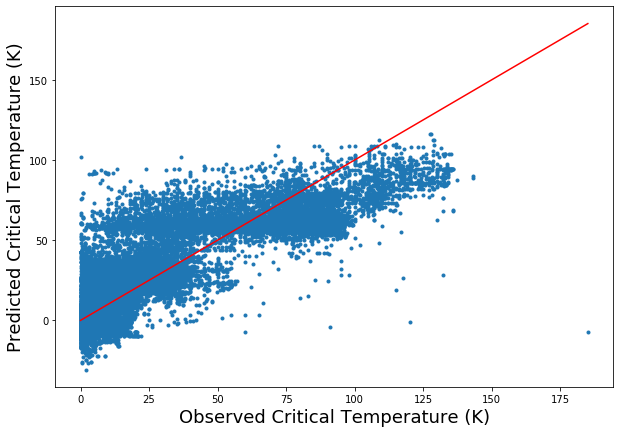

In [194]:
Y=res.predict(x_vals_new1)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(y_vals,Y,'.')
ax.plot(np.unique(y_vals), np.poly1d(np.polyfit(Y, y_vals, 1))(np.unique(y_vals)),
         color='red')
plt.xlabel("Observed Critical Temperature (K)",size=18)
plt.ylabel("Predicted Critical Temperature (K)",size=18)
#plt.ylim(-1, 20)
#plt.title("Random Forest Regression",size=20)
plt.axis('tight')

In [195]:
RMSE= sqrt(mean_squared_error(y_vals, Y))
RMSE

18.791543278514993

In [196]:
print("r2=", r2_score(y_vals, Y))

r2= 0.6990366966729764


In [197]:
X_train, X_test, Y_train, Y_test = train_test_split(x_vals_new1, y_vals, random_state=0)

In [198]:
model=sm.OLS(Y_train,X_train)
res = model.fit()
#print(res.summary())
Y_pred=res.predict(X_test)
RMSE_lgr= sqrt(mean_squared_error(Y_test, Y_pred))
print(RMSE_lgr)
r2 = r2_score(Y_test, Y_pred)
print("r2=", r2_score(Y_test, Y_pred))

18.892937165406497
r2= 0.6945483757200022


(-34.30602800956218, 144.1098108575982, -6.799349000000001, 142.799969)

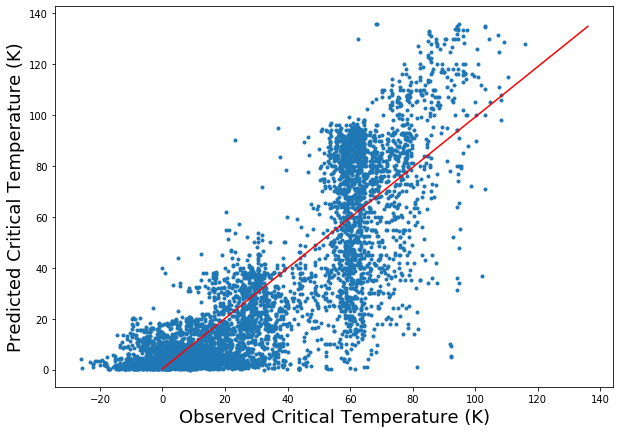

In [199]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(Y_pred,Y_test,'.')
ax.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_pred, Y_test, 1))(np.unique(Y_test)),color='red')
plt.xlabel("Observed Critical Temperature (K)",size=18)
plt.ylabel("Predicted Critical Temperature (K)",size=18)
#plt.ylim(-1, 20)
#plt.title("Random Forest Regression",size=20)
plt.axis('tight')

In [200]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [201]:
print(lin_reg.intercept_)

-9.045278787045945


In [202]:
coeff_df = pd.DataFrame(lin_reg.coef_, x_vals_new1.columns, columns=['Coefficient'])
coeff_df

Coefficient
range_ThermalConductivity           0.004190
wtd_gmean_ThermalConductivity      -0.416180
range_atomic_radius                 0.162503
entropy_FusionHeat                -16.289829
wtd_std_ElectronAffinity           -0.532126
std_ElectronAffinity                0.298700
std_Density                        -0.000869
std_atomic_mass                     0.414325
wtd_mean_Valence                   -3.304154
wtd_mean_ThermalConductivity        0.388681
wtd_entropy_ThermalConductivity    12.932752
wtd_std_Valence                   -11.612999
wtd_entropy_FusionHeat             20.926075
gmean_Valence                       1.879083
wtd_entropy_Density                -9.208948
wtd_gmean_ElectronAffinity         -0.606048
wtd_entropy_atomic_mass            10.182855
wtd_range_Valence                   4.982873
wtd_range_ElectronAffinity         -0.219604
wtd_gmean_Density                   0.000856
gmean_ThermalConductivity           0.046269
entropy_ThermalConductivity         2.057402
wtd_entropy_ElectronAffinity      -32.901534
mean_Density                       -0.001085
std_FusionHeat                     -0.531045
wtd_range_fie                       0.008943
wtd_entropy_fie                    10.465754
range_fie                          -0.004878
wtd_mean_atomic_mass                0.018903
wtd_range_Density                  -0.000097
gmean_fie                           0.019035
wtd_mean_FusionHeat                 0.119760
wtd_range_atomic_radius            -0.077986
wtd_mean_ElectronAffinity           0.571308
entropy_Density                     4.957822
wtd_std_FusionHeat                 -0.053305
mean_ThermalConductivity           -0.029206
gmean_ElectronAffinity              0.080213
wtd_std_atomic_mass                -0.215687
Intercept                           0.000000

In [203]:
pred = lin_reg.predict(X_test)

Text(0, 0.5, 'Predicted  (K)')

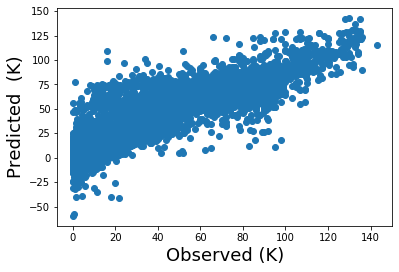

In [230]:
plt.scatter(Y_test, pred)
plt.xlabel("Observed (K)",size=18)
plt.ylabel("Predicted  (K)",size=18)

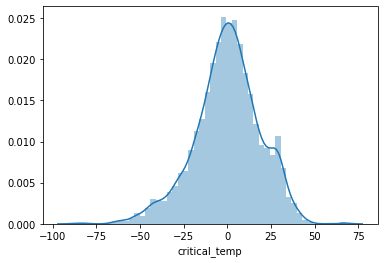

In [205]:
sns.distplot((Y_test - pred), bins=50);

In [206]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [207]:
print_evaluate(Y_test, lin_reg.predict(X_test))
RMSE_lr= sqrt(mean_squared_error(Y_test, pred))
print("RMSE_lr=", RMSE_lr)

MAE: 14.540013756945685
MSE: 356.94307473599804
RMSE: 18.892937165406497
R2 Square 0.6945483757200022
RMSE_lr= 18.892937165406497


In [208]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model        MAE         MSE       RMSE  R2 Square  \
0  Linear Regression  14.540014  356.943075  18.892937   0.694548   

   Cross Validation  
0               1.0

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor()
model.fit(X_train, Y_train)

pred = model.predict(X_test)
print_evaluate(Y_test, pred)
RMSE_rr= sqrt(mean_squared_error(Y_test, pred))
print("RMSE_rr=", RMSE_rr)

MAE: 54.290281137585026
MSE: 7102.813945704792
RMSE: 84.27819377338834
R2 Square -5.078185039109672
RMSE_rr= 84.27819377338834


In [210]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(Y_test, pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE          MSE       RMSE  R2 Square  \
0  Linear Regression  14.540014   356.943075  18.892937   0.694548   
1  Robust Regression  54.290281  7102.813946  84.278194  -5.078185   

   Cross Validation  
0               1.0  
1               1.0

In [211]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

print_evaluate(Y_test, pred)

MAE: 14.537462622626203
MSE: 356.93677240133167
RMSE: 18.892770373911066
R2 Square 0.694553768900307


In [212]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(Y_test, pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE          MSE       RMSE  R2 Square  \
0  Linear Regression  14.540014   356.943075  18.892937   0.694548   
1  Robust Regression  54.290281  7102.813946  84.278194  -5.078185   
2   Ridge Regression  14.537463   356.936772  18.892770   0.694554   

   Cross Validation  
0          1.000000  
1          1.000000  
2          0.999999

In [213]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

print_evaluate(Y_test, pred)

MAE: 15.139748520877184
MSE: 383.8072852457738
RMSE: 19.591000108360312
R2 Square 0.6715595091023212


In [214]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(Y_test, pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE          MSE       RMSE  R2 Square  \
0  Linear Regression  14.540014   356.943075  18.892937   0.694548   
1  Robust Regression  54.290281  7102.813946  84.278194  -5.078185   
2   Ridge Regression  14.537463   356.936772  18.892770   0.694554   
3   Lasso Regression  15.139749   383.807285  19.591000   0.671560   

   Cross Validation  
0          1.000000  
1          1.000000  
2          0.999999  
3          0.999672

In [215]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

print_evaluate(Y_test, pred)

MAE: 15.202745146912706
MSE: 386.7980153500166
RMSE: 19.667181174484984
R2 Square 0.6690002120244897


In [216]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(Y_test, pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE          MSE       RMSE  R2 Square  \
0       Linear Regression  14.540014   356.943075  18.892937   0.694548   
1       Robust Regression  54.290281  7102.813946  84.278194  -5.078185   
2        Ridge Regression  14.537463   356.936772  18.892770   0.694554   
3        Lasso Regression  15.139749   383.807285  19.591000   0.671560   
4  Elastic Net Regression  15.202745   386.798015  19.667181   0.669000   

   Cross Validation  
0          1.000000  
1          1.000000  
2          0.999999  
3          0.999672  
4          0.883063

In [217]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_vals_new1)

X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y_vals, test_size=0.4, random_state=101)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,Y_train)
pred = lin_reg.predict(X_test)

print_evaluate(Y_test, pred)

MAE: 10.487473744829018
MSE: 218.42921821712127
RMSE: 14.779351075643385
R2 Square 0.8151236703242015


In [218]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(Y_test, pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model        MAE          MSE       RMSE  R2 Square  \
0       Linear Regression  14.540014   356.943075  18.892937   0.694548   
1       Robust Regression  54.290281  7102.813946  84.278194  -5.078185   
2        Ridge Regression  14.537463   356.936772  18.892770   0.694554   
3        Lasso Regression  15.139749   383.807285  19.591000   0.671560   
4  Elastic Net Regression  15.202745   386.798015  19.667181   0.669000   
5   Polynomail Regression  10.487474   218.429218  14.779351   0.815124   

   Cross Validation  
0          1.000000  
1          1.000000  
2          0.999999  
3          0.999672  
4          0.883063  
5          0.000000

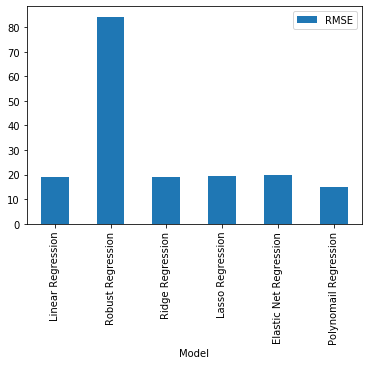

In [219]:
results_df.plot(x='Model',y='RMSE',kind='bar')
plt.savefig('Model Comparison.png')
plt.show()